In [1]:
%reset
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


Matplotlib is building the font cache; this may take a moment.


In [2]:
import numpy as np
import scipy.io as sio
import netCDF4 as nc
import glob, os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib.colors as mcolors
import xarray as xr
from mpl_toolkits.axes_grid1 import make_axes_locatable

#Creating red colormap
colors = plt.cm.Reds(np.linspace(0, 1, 256))
colors[0,:]=(1.0, 1.0, 1.0, 1.0)
Red = mcolors.LinearSegmentedColormap.from_list('colormap', colors)

In [3]:
%cd /archive/eay/KaraSea_Simulations/Original2D
fileds = ['HR1.nc','HR2.nc','HR3.nc','HR4.nc','HR5.nc','HR6.nc']
filedtr= ['HRtracer1.nc','HRtracer2.nc','HRtracer3.nc','HRtracer4.nc','HRtracer5.nc','HRtracer6.nc']
ds = xr.open_mfdataset(fileds).sortby('T')
tr = xr.open_mfdataset(filedtr).sortby('T')
print(ds)


/archa/eay/KaraSea_Simulations/Original2D
<xarray.Dataset>
Dimensions:  (Zl: 240, Yp1: 2, Y: 1, X: 1280, Xp1: 1281, Z: 240, T: 246)
Coordinates:
  * Zl       (Zl) float64 0.0 -6.597 -13.19 ... -2.427e+03 -2.449e+03 -2.471e+03
  * Yp1      (Yp1) float64 0.0 200.0
  * Y        (Y) float64 100.0
  * X        (X) float64 28.12 84.36 140.6 ... 7.483e+04 7.49e+04 7.496e+04
  * Xp1      (Xp1) float64 -2.842e-14 56.24 112.5 ... 7.493e+04 7.5e+04
  * Z        (Z) float64 -3.299 -9.896 -16.49 ... -2.46e+03 -2.481e+03
  * T        (T) float64 0.0 2.16e+04 4.32e+04 ... 5.141e+06 5.162e+06 5.184e+06
Data variables:
    phi_nh   (T, Z, Y, X) float32 dask.array<chunksize=(41, 240, 1, 1280), meta=np.ndarray>
    Temp     (T, Z, Y, X) float32 dask.array<chunksize=(41, 240, 1, 1280), meta=np.ndarray>
    iter     (T) int32 dask.array<chunksize=(41,), meta=np.ndarray>
    S        (T, Z, Y, X) float32 dask.array<chunksize=(41, 240, 1, 1280), meta=np.ndarray>
    Eta      (T, Y, X) float32 dask.array<chun

In [4]:
xq=ds['X']
zl=ds['Zl']
tracer = np.squeeze(tr.tracer)
salt = np.squeeze(ds.S)
u = np.squeeze(ds.U)
w = np.squeeze(ds.W)
v = np.squeeze(ds.V)
i=10 #time index
traceri=np.array(tracer[i,:,:])
traceri[traceri==0]=np.nan;

salti=np.array(salt[i,:,:]); 
mask=salti; mask[mask>0]=np.nan; mask[mask==0]=1.0

salti=np.array(salt[i,:,:]); 
salti[salti==0]=np.nan
print(salti)

[[      nan 34.726894 34.72017  ... 34.461464 34.461464 34.461464]
 [      nan 34.67993  34.70718  ... 34.474407 34.474407 34.474407]
 [      nan 34.686165 34.70249  ... 34.48731  34.48731  34.48731 ]
 ...
 [      nan       nan       nan ... 34.9139   34.9139   34.9139  ]
 [      nan       nan       nan ... 34.9139   34.9139   34.9139  ]
 [      nan       nan       nan ... 34.9139   34.9139   34.9139  ]]


In [5]:
%cd /work/eay/
#mitgcm_videos/gif2D
#%rm *.png
%ls
%mkdir gif2D


/work2/eay
.cshrc: No such file or directory.
CM2.6/                 paperfigures/
EOF_analysis_CM2.6.nc  parameterspace2D/
GCM_analysis/          Rotating Gravity Current Documentation.ipynb
grid_gen/              test/
JAMES_YLH_2020/        test1/
JAMES_YLH_2020.tar.gz  text
MITgcm_codes/          u_1year_CM2_1deg.nc
MITgcm_data/           u_1year_CM2.5.nc
MITgcm_HR/             u_1year_CM2.6.nc
mitgcmuv               v_1year_CM2_1deg.nc
MOM6/                  v_1year_CM2.5.nc
OM4_rerun2/            v_1year_CM2.6.nc
.cshrc: No such file or directory.


/work2/eay/gif2D


/vftmp/Elizabeth.Yankovsky/pid23791/ipykernel_17440/2887835724.py:17: UserWarning: shading value 'goaround' not in list of valid values ['gouraud', 'nearest', 'flat', 'auto']. Setting shading='auto'.
  quad1 = ax1.pcolormesh(xq/1000,zl,traceri,cmap=Red,vmin=0.0,vmax=1.0,shading='goaround')


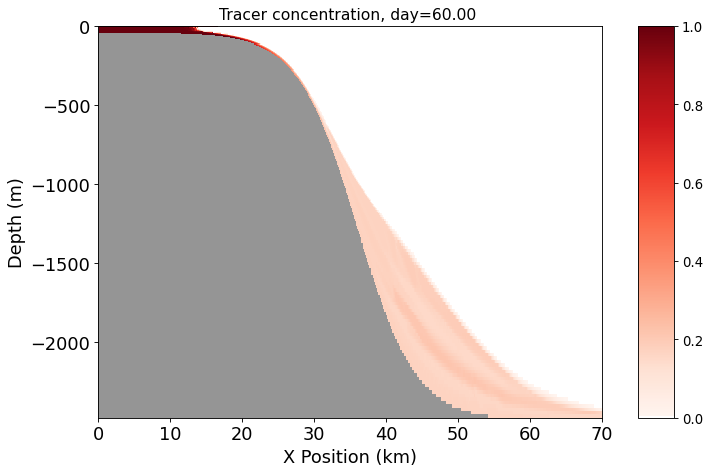

In [6]:
%cd /work/eay/gif2D
#%rm *.png
#PLOTTING EXAMPLE
fig = plt.figure(figsize=(9, 7), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax2 = fig.add_axes([.9, 0.1, 0.05, 0.7])
ax1.invert_yaxis

quad0= ax1.pcolormesh(xq/1000,zl,mask,cmap='Greys',vmin=0,vmax=2.)
quad1 = quad0
ax1.set_xlabel('X Position (km)',fontsize=16); ax1.set_ylabel('Depth (m)',fontsize=16)
ax1.tick_params(labelsize=16); ax2.tick_params(labelsize=12);

for i in range(240,241):
    traceri=np.array(tracer[i,:,:])
    traceri[traceri==0]=np.nan;
    quad1 = ax1.pcolormesh(xq/1000,zl,traceri,cmap=Red,vmin=0.0,vmax=1.0,shading='goaround')
    cb1 = fig.colorbar(quad1,ax2)
    ax1.set_title('Tracer concentration, day=%05.2f ' %(i/4.), fontsize=14)
    ax1.set_xlim(0,70)
    plt.savefig('index%.3d'%i)


/work2/eay/gif2D


/vftmp/Elizabeth.Yankovsky/pid23791/ipykernel_17440/1536253956.py:15: UserWarning: shading value 'goaround' not in list of valid values ['gouraud', 'nearest', 'flat', 'auto']. Setting shading='auto'.
  quad1 = ax1.pcolormesh(xq/1000,zl,ui,cmap='RdBu_r',vmin=-0.02,vmax=0.02,shading='goaround')


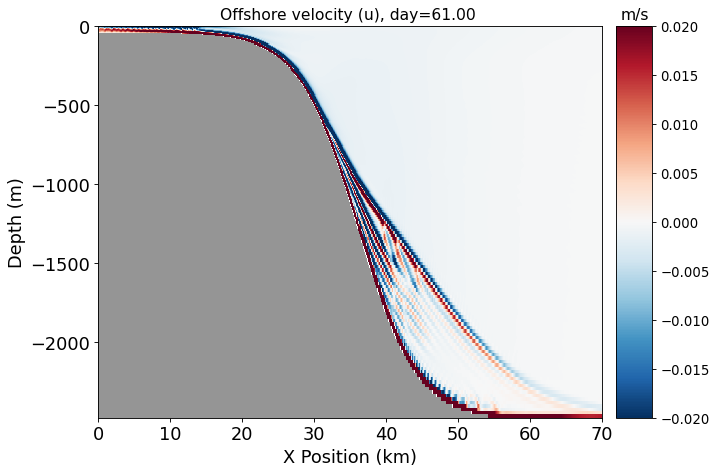

In [7]:
%cd /work/eay/gif2D
#%rm *.png
fig = plt.figure(figsize=(9, 7), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax2 = fig.add_axes([.87, 0.1, 0.05, 0.7])
ax1.invert_yaxis

quad0= ax1.pcolormesh(xq/1000,zl,mask,cmap='Greys',vmin=0,vmax=2.)
ax1.set_xlabel('X Position (km)',fontsize=16); ax1.set_ylabel('Depth (m)',fontsize=16)
ax1.tick_params(labelsize=16); ax2.tick_params(labelsize=12);

for i in range(220,245):
    ui=np.array(u[i,:,0:1280])
    ui[ui==0]=np.nan;
    quad1 = ax1.pcolormesh(xq/1000,zl,ui,cmap='RdBu_r',vmin=-0.02,vmax=0.02,shading='goaround')
    cb1 = fig.colorbar(quad1,ax2)
    ax1.set_title('Offshore velocity (u), day=%05.2f ' %(i/4.), fontsize=14)
    ax2.set_title('m/s', fontsize=14)
    ax1.set_xlim(0,70)
    plt.savefig('index%.3d'%i)

/work2/eay/gif2D


/vftmp/Elizabeth.Yankovsky/pid23791/ipykernel_17440/2810197456.py:15: UserWarning: shading value 'goaround' not in list of valid values ['gouraud', 'nearest', 'flat', 'auto']. Setting shading='auto'.
  quad1 = ax1.pcolormesh(xq/1000,zl,wi*1000,cmap='RdBu_r',vmin=-2,vmax=2,shading='goaround')


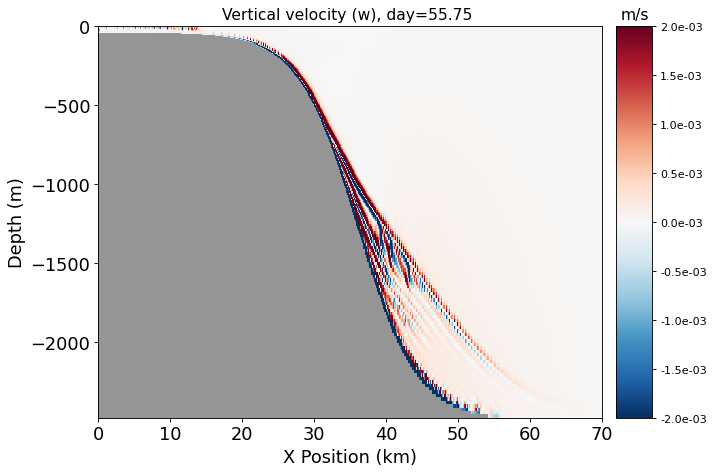

In [8]:
%cd /work/eay/gif2D
#%rm *.png
fig = plt.figure(figsize=(9, 7), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax2 = fig.add_axes([.87, 0.1, 0.05, 0.7])
ax1.invert_yaxis

quad0= ax1.pcolormesh(xq/1000,zl,mask,cmap='Greys',vmin=0,vmax=2.)
ax1.set_xlabel('X Position (km)',fontsize=16); ax1.set_ylabel('Depth (m)',fontsize=16)
ax1.tick_params(labelsize=16); ax2.tick_params(labelsize=10);

for i in range(223,224):
    wi=np.array(w[i,:,0:1280])
    wi[wi==0]=np.nan;
    quad1 = ax1.pcolormesh(xq/1000,zl,wi*1000,cmap='RdBu_r',vmin=-2,vmax=2,shading='goaround')
    cb1 = fig.colorbar(quad1,ax2,format='%.1fe-03')
    #quad1 = ax1.pcolormesh(xq/1000,zl,wi,cmap='RdBu_r',vmin=-.002,vmax=.002,shading='goaround')
    #cb1 = fig.colorbar(quad1,ax2,format='%.3e')
    
    ax1.set_xlim(0,70)
    ax1.set_title('Vertical velocity (w), day=%05.2f ' %(i/4.), fontsize=14)
    ax2.set_title('m/s', fontsize=14)
    plt.savefig('index%.3d'%i)

In [9]:

from mpl_toolkits.axes_grid1 import AxesGrid

def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero.

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower offset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax / (vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highest point in the colormap's range.
          Defaults to 1.0 (no upper offset). Should be between
          `midpoint` and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap

/work2/eay/gif2D
.cshrc: No such file or directory.
rm: No match.


/vftmp/Elizabeth.Yankovsky/pid23791/ipykernel_17440/799480842.py:16: UserWarning: shading value 'goaround' not in list of valid values ['gouraud', 'nearest', 'flat', 'auto']. Setting shading='auto'.
  quad1 = ax1.pcolormesh(xq/1000,zl,vi,cmap='shifted',vmin=-0.2,vmax=.6,shading='goaround')


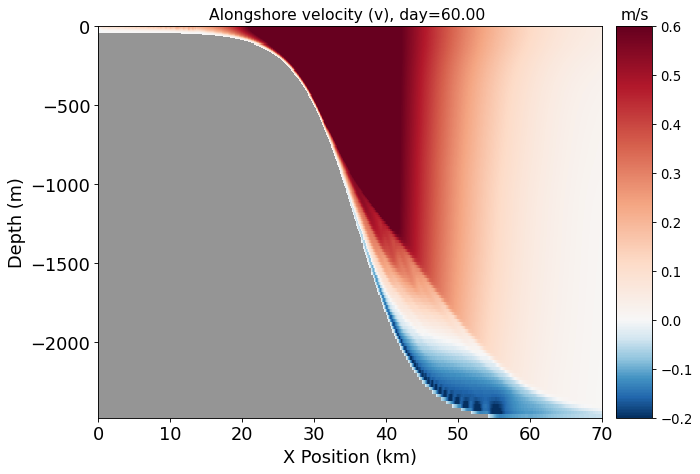

In [10]:
%cd /work/eay/gif2D
%rm *.png
fig = plt.figure(figsize=(9, 7), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax2 = fig.add_axes([.87, 0.1, 0.05, 0.7])
ax1.invert_yaxis

quad0= ax1.pcolormesh(xq/1000,zl,mask,cmap='Greys',vmin=0,vmax=2.)
ax1.set_xlabel('X Position (km)',fontsize=16); ax1.set_ylabel('Depth (m)',fontsize=16)
ax1.tick_params(labelsize=16); ax2.tick_params(labelsize=12);
orig_cmap = matplotlib.cm.RdBu_r
shifted_cmap = shiftedColorMap(orig_cmap, midpoint=0.25, name='shifted')
for i in range(240,241):
    vi=np.array(v[i,:,0,0:1280])
    vi[vi==0]=np.nan;
    quad1 = ax1.pcolormesh(xq/1000,zl,vi,cmap='shifted',vmin=-0.2,vmax=.6,shading='goaround')
    cb1 = fig.colorbar(quad1,ax2)
    ax1.set_title('Alongshore velocity (v), day=%05.2f ' %(i/4.), fontsize=14)
    ax2.set_title('m/s', fontsize=14)
    ax1.set_xlim(0,70)
    plt.savefig('index%.3d'%i)

In [ ]:
%cd /work/eay/gif2D
#%rm *.png
fig = plt.figure(figsize=(16, 10), dpi= 160, facecolor='w', edgecolor='k')
fig.suptitle('Evolution of a symmetrically unstable geostrophic front',fontsize=20,fontweight="bold")
ax1 = fig.add_axes([0.15,0.1,0.25,0.35])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax2 = fig.add_axes([0.15,0.52,0.25,0.35])
ax3 = fig.add_axes([0.55,0.1,0.25,0.35])
ax4 = fig.add_axes([0.55,0.52,0.25,0.35])
cax1 = fig.add_axes([.43, 0.1, 0.03, 0.35])
cax2 = fig.add_axes([.43, 0.52, 0.03, 0.35])
cax3 = fig.add_axes([.83, 0.1, 0.03, 0.35])
cax4 = fig.add_axes([.83, 0.52, 0.03, 0.35])



quad0= ax1.pcolormesh(xq/1000,zl,mask,cmap='Greys',vmin=0,vmax=2.)
quad0= ax2.pcolormesh(xq/1000,zl,mask,cmap='Greys',vmin=0,vmax=2.)
quad0= ax3.pcolormesh(xq/1000,zl,mask,cmap='Greys',vmin=0,vmax=2.)
quad0= ax4.pcolormesh(xq/1000,zl,mask,cmap='Greys',vmin=0,vmax=2.)

ax1.set_xlabel('X Position (km)',fontsize=16); ax3.set_xlabel('X Position (km)',fontsize=16); 
ax1.set_ylabel('Depth (m)',fontsize=16); ax2.set_ylabel('Depth (m)',fontsize=16)
#ax1.tick_params(labelsize=16); ax2.tick_params(labelsize=12);
orig_cmap = matplotlib.cm.RdBu_r
shifted_cmap = shiftedColorMap(orig_cmap, midpoint=0.25, name='shifted')

for i in range(230,241):
    ui=np.array(u[i,:,0:1280])
    ui[ui==0]=np.nan;    
    wi=np.array(w[i,:,0:1280])
    wi[wi==0]=np.nan;
    vi=np.array(v[i,:,0,0:1280])
    vi[vi==0]=np.nan;
    traceri=np.array(tracer[i,:,:])
    traceri[traceri==0]=np.nan;
    
    quad2 = ax2.pcolormesh(xq/1000,zl,vi,cmap='shifted',vmin=-0.2,vmax=.6,shading='goaround')
    quad1 = ax1.pcolormesh(xq/1000,zl,traceri,cmap=Red,vmin=0.0,vmax=1.0,shading='goaround')
    quad4 = ax4.pcolormesh(xq/1000,zl,ui,cmap='RdBu_r',vmin=-0.02,vmax=0.02,shading='goaround')
    quad3 = ax3.pcolormesh(xq/1000,zl,wi*1000,cmap='RdBu_r',vmin=-2,vmax=2,shading='goaround')
    cb2 = fig.colorbar(quad2,cax2)
    cb1 = fig.colorbar(quad1,cax1)
    cb4 = fig.colorbar(quad4,cax4)
    cb3 = fig.colorbar(quad3,cax3,format='%.1fe-03')
    ax2.set_title('Alongshore velocity (v), day=%05.2f ' %(i/4.), fontsize=14); cax2.set_title('m/s', fontsize=14)
    ax1.set_title('Tracer concentration, day=%05.2f ' %(i/4.), fontsize=14)
    ax4.set_title('Offshore velocity (u), day=%05.2f ' %(i/4.), fontsize=14); cax4.set_title('m/s', fontsize=14)
    ax3.set_title('Vertical velocity (w), day=%05.2f ' %(i/4.), fontsize=14); cax3.set_title('m/s', fontsize=14)
    #axcolor.set_title('m/s', fontsize=14)
    ax1.set_xlim(0,70)
    ax2.set_xlim(0,70)
    ax3.set_xlim(0,70)
    ax4.set_xlim(0,70)

    plt.savefig('index%.3d'%i)
    print(i)

/work2/eay/gif2D


/vftmp/Elizabeth.Yankovsky/pid23791/ipykernel_17440/3252432041.py:50: UserWarning: Trying to register the cmap 'shifted' which already exists.
  plt.register_cmap(cmap=newcmap)
/vftmp/Elizabeth.Yankovsky/pid23791/ipykernel_17440/2446572380.py:37: UserWarning: shading value 'goaround' not in list of valid values ['gouraud', 'nearest', 'flat', 'auto']. Setting shading='auto'.
  quad2 = ax2.pcolormesh(xq/1000,zl,vi,cmap='shifted',vmin=-0.2,vmax=.6,shading='goaround')
/vftmp/Elizabeth.Yankovsky/pid23791/ipykernel_17440/2446572380.py:38: UserWarning: shading value 'goaround' not in list of valid values ['gouraud', 'nearest', 'flat', 'auto']. Setting shading='auto'.
  quad1 = ax1.pcolormesh(xq/1000,zl,traceri,cmap=Red,vmin=0.0,vmax=1.0,shading='goaround')
/vftmp/Elizabeth.Yankovsky/pid23791/ipykernel_17440/2446572380.py:39: UserWarning: shading value 'goaround' not in list of valid values ['gouraud', 'nearest', 'flat', 'auto']. Setting shading='auto'.
  quad4 = ax4.pcolormesh(xq/1000,zl,ui,c

230
231
232
233
234
235
